<a href="https://colab.research.google.com/github/aleksandra0014/Rozpoznawanie-cyfr/blob/master/pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
pd.DataFrame(X_train[1])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,159,50,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,252,237,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,233,252,57,6,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,84,252,253,122,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,96,189,253,167,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,47,79,255,168,0,0,0,0,0,0


Każde zdjęcie to 28x28 pikseli czyli łącznie jedno zdjęcie ma 784 pikseli. Każdy piksel jest zakodowany od 0 do 255, gdzie 0 to czarny a 255 to biały.

Text(0.5, 1.0, '4')

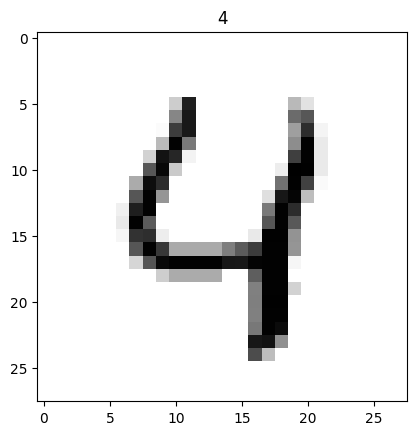

In [ ]:
plt.imshow(X_test[4], cmap='binary')
plt.title(y_test[4])

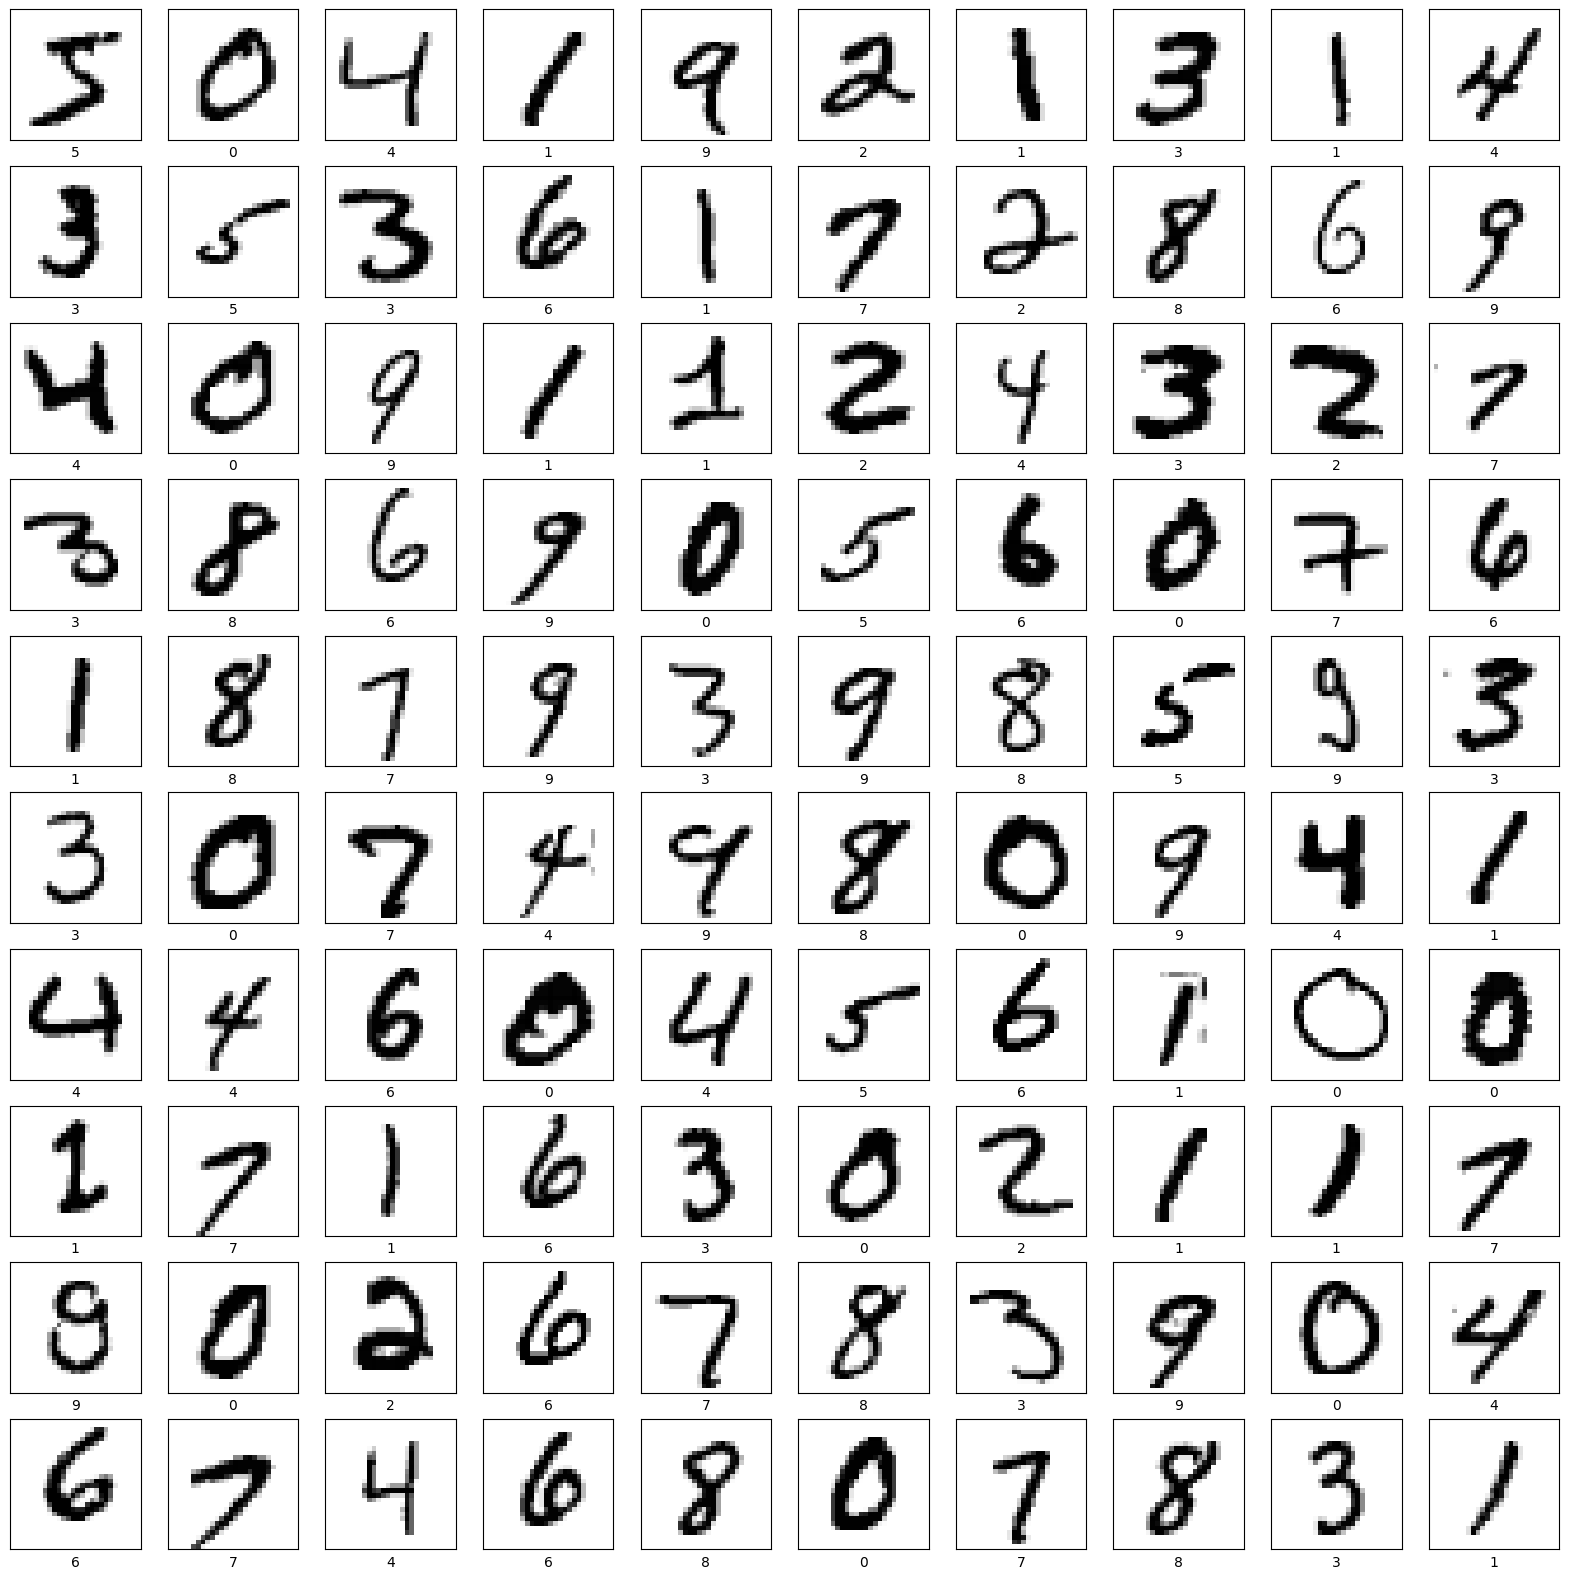

In [ ]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([]) # ukrywa oznaczenia osi x na każdym małym wykresie
    plt.yticks([])
    #plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
# NORMALIZATION
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255


In [ ]:
pd.DataFrame(X_train[1])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.623529,0.196078,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.988235,0.929412,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.913725,0.988235,0.223529,0.023529,0.000000,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.329412,0.988235,0.992157,0.478431,0.000000,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.376471,0.741176,0.992157,0.654902,0.000000,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.184314,0.309804,1.000000,0.658824,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train = np.expand_dims(X_train, -1)
y_train = np.expand_dims(y_train, -1)


In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
y_train = keras.utils.to_categorical(y_train) # skategoryzowanie wyników czyli jedna kolumna odpowiada jednej z 10 cyfr
y_test = keras.utils.to_categorical(y_test)

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (5,5), input_shape=(28,28,1), activation='relu')) # strides czyli o ile przesuwa się filtr jest ustawiony domyślnie na 1,1
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=4, verbose=1)
mc = ModelCheckpoint('./bestmodel.h5', monitor='val_acc', verbose=1, save_best_onlu=True)
cb = [es,mc]


In [ ]:
hist = model.fit(X_train, y_train, epochs=5, validation_split=0.3, callbacks=cb) # domyślnie batch size = 32, czyli ile danych jest branych pod uwagę w każdej interacji do uaktualnienia wag wykorzystuję się 32 przykłady treningowe

Epoch 1/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.2218 - accuracy: 0.9325WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 1: saving model to .\bestmodel.h5
1313/1313 [==============================] - 67s 49ms/step - loss: 0.2217 - accuracy: 0.9325 - val_loss: 0.0688 - val_accuracy: 0.9808
Epoch 2/5
   2/1313 [..............................] - ETA: 1:14 - loss: 0.0145 - accuracy: 1.0000

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1313/1313 [==============================] - ETA: 0s - loss: 0.0663 - accuracy: 0.9810WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 2: saving model to .\bestmodel.h5
1313/1313 [==============================] - 60s 45ms/step - loss: 0.0663 - accuracy: 0.9810 - val_loss: 0.0448 - val_accuracy: 0.9871
Epoch 3/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.0482 - accuracy: 0.9855WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 3: saving model to .\bestmodel.h5
1313/1313 [==============================] - 59s 45ms/step - loss: 0.0481 - accuracy: 0.9855 - val_loss: 0.0491 - val_accuracy: 0.9869
Epoch 4/5
1313/1313 [==============================] - ETA: 0s - loss: 0.0391 - accuracy: 0.9888WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which 

In [ ]:
model_S=keras.models.load_model('C:\\Users\\HP\\Desktop\\projekty\\digit recognition\\bestmodel.h5')

In [ ]:
score=model_S.evaluate(X_test, y_test)
print(score[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.0312 - accuracy: 0.9917
0.9916999936103821


In [ ]:
p = model.predict([X_test])
predictions = np.argmax(p, axis=1)

313/313 [==============================] - 4s 13ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
y_true = np.argmax(y_test, axis=1)
frame = pd.DataFrame()
frame['true'] = y_true
frame['pred'] = predictions
frame

,true,pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


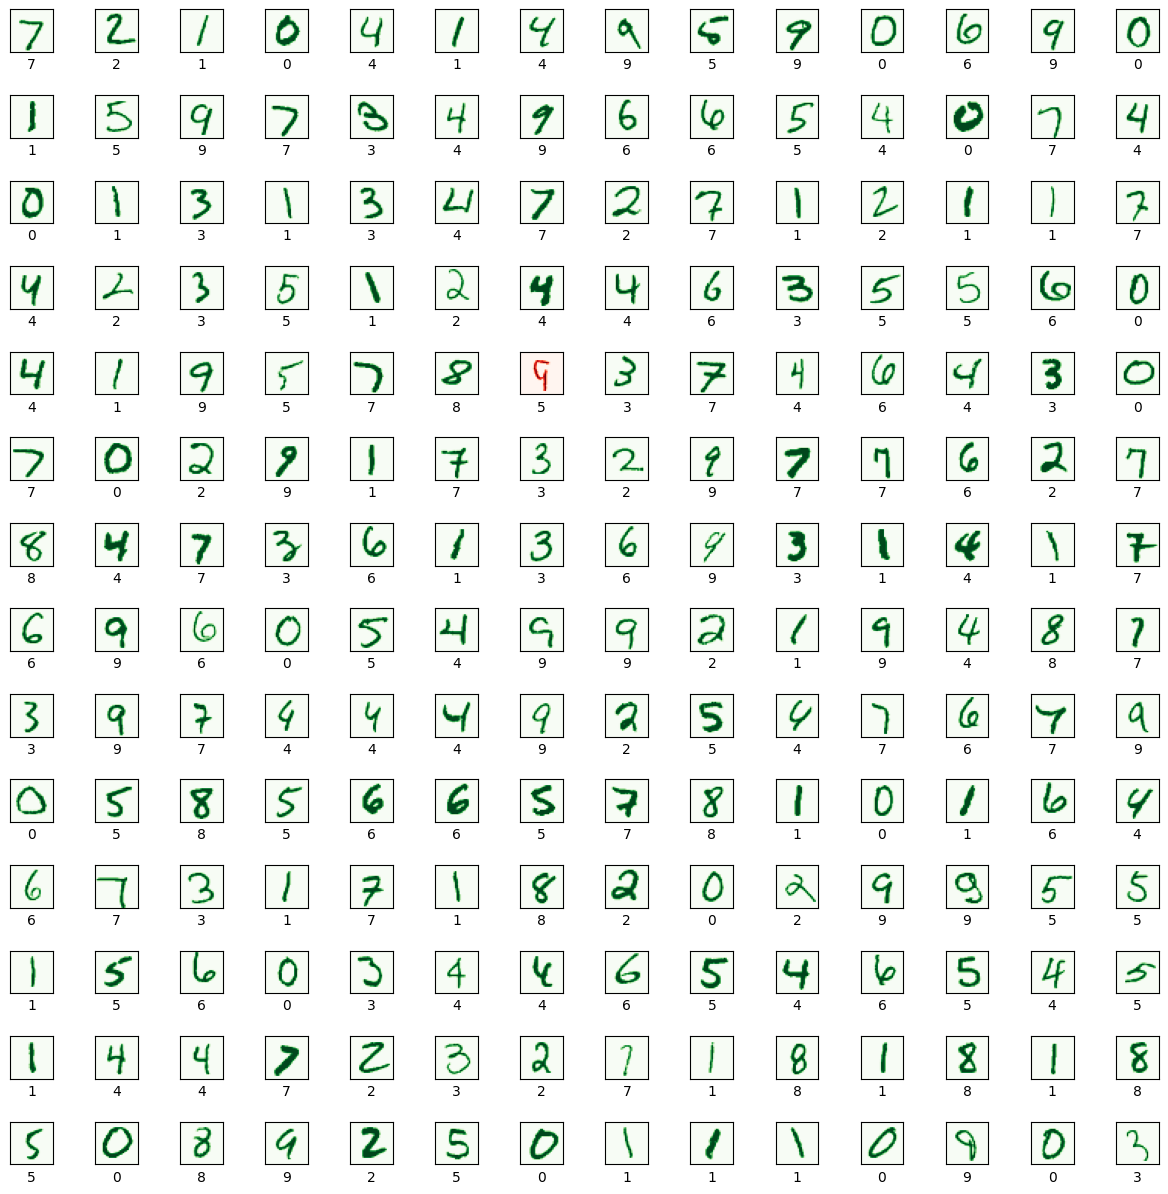

In [ ]:
import matplotlib.pyplot as plt
import math

# numbers_to_display to ilość obrazów, które chcesz wyświetlić
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))

plt.figure(figsize=(15, 15))

# Iteracja po wszystkich obrazach do wyświetlenia
for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    true_label = y_true[plot_index]

    # Ustawienie koloru w zależności od poprawności predykcji
    if predicted_label == true_label:
        color_map = 'Greens'
    else: color_map = 'Reds'

    # Ustawienie tytułu wykresu na przewidywaną etykietę
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(X_test[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()


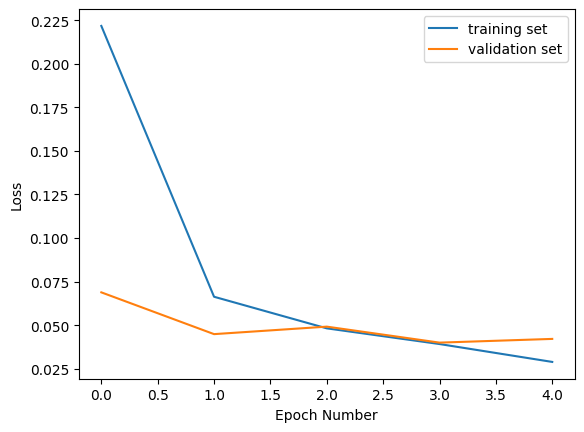

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(hist.history['loss'], label='training set')
plt.plot(hist.history['val_loss'], label='validation set')
plt.legend()

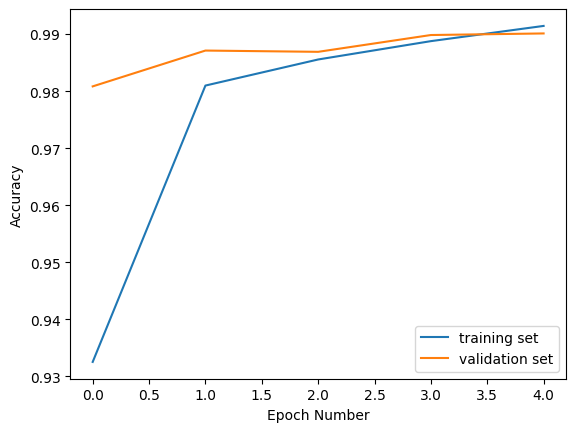

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='training set')
plt.plot(hist.history['val_accuracy'], label='validation set')
plt.legend()